<a href="https://colab.research.google.com/github/FrankieGirardot/Info_Retrieval_Project/blob/main/Information%20Retrieval%20and%20Knowledge%20Discovery%20Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import time
import torch
import matplotlib as plt

from matplotlib import pyplot as pylt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [3]:
#Pull in the dataset
rawData = pd.read_excel('/content/drive/MyDrive/Fall 2020/Info Retrieval/ReviewsDataset.xlsx')
print(rawData)

                       id  ... reviews.rating
0    AWFUWc8THh53nbDRF6YO  ...              4
1    AWFUWc8THh53nbDRF6YO  ...              4
2    AWFUWc8THh53nbDRF6YO  ...              4
3    AWFUWc8THh53nbDRF6YO  ...              4
4    AWFUWc8THh53nbDRF6YO  ...              4
..                    ...  ...            ...
988  AWFUWc8THh53nbDRF6YO  ...              2
989  AWFUWc8THh53nbDRF6YO  ...              2
990  AWFUWc8THh53nbDRF6YO  ...              2
991  AWFUWc8THh53nbDRF6YO  ...              2
992  AWFUWc8THh53nbDRF6YO  ...              2

[993 rows x 12 columns]


In [4]:
#This is a textmining project so only keep the attributes that are text and the labels of course
data = rawData[['reviews.text']] #, 'reviews.title'
labels = rawData[['reviews.rating']]


In [5]:
#We are going to create a second criteria of predicting positive vs negative as opposed to predicting
#the number of stars, due to the large number of 4 & 5 stars we are considering 3 star reviews as negative: 
#0, negative
#1, positive
labelDictionary = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}
binaryData = rawData.replace({'reviews.rating': labelDictionary})


In [6]:
#Split into Train and test datasets
x_train, x_test, y_train, y_test = train_test_split(data['reviews.text'], labels['reviews.rating'], test_size=0.15 )

x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(data['reviews.text'], binaryData['reviews.rating'], test_size=0.15 )


In [7]:
#Bag-of-words to convert text into numerical feature vectors
vect = CountVectorizer().fit(x_train)
vectBinary = CountVectorizer().fit(x_train_binary)

#transform documents in x_train to document term matrix
x_train_vectorized = vect.transform(x_train)
x_train_vectorized_binary = vectBinary.transform(x_train_binary)

In [8]:
#Create the logistic regression model
model = LogisticRegression(multi_class = 'multinomial',max_iter=1000)
model.fit(x_train_vectorized, y_train)

model_binary = LogisticRegression(max_iter=1000)
model_binary.fit(x_train_vectorized_binary, y_train_binary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Testing purposes of each class
validate = rawData[['reviews.text','reviews.rating']]
validate_binary = binaryData[['reviews.text','reviews.rating']]

five = validate.loc[validate['reviews.rating'] == 5]
five_labels = five[['reviews.rating']]

four = validate.loc[validate['reviews.rating'] == 4]
four_labels = four[['reviews.rating']]

three = validate.loc[validate['reviews.rating'] == 3]
three_labels = three[['reviews.rating']]

two = validate.loc[validate['reviews.rating'] == 2]
two_labels = two[['reviews.rating']]

one = validate.loc[validate['reviews.rating'] == 1]
one_labels = one[['reviews.rating']]

pos = validate_binary.loc[validate_binary['reviews.rating'] == 1]
pos_labels = pos[['reviews.rating']]

neg = validate_binary.loc[validate_binary['reviews.rating'] == 0]
neg_labels = neg[['reviews.rating']]

In [11]:
#Predictions
print(model.score(vect.transform(five['reviews.text']),five_labels))
print(model.score(vect.transform(four['reviews.text']),four_labels))
print(model.score(vect.transform(three['reviews.text']),three_labels))
print(model.score(vect.transform(two['reviews.text']),two_labels))
print(model.score(vect.transform(one['reviews.text']),one_labels))
 
print(model_binary.score(vectBinary.transform(pos['reviews.text']),pos_labels))
print(model_binary.score(vectBinary.transform(neg['reviews.text']),neg_labels))



0.9883333333333333
0.8554216867469879
0.8837209302325582
0.86
0.9411764705882353
0.9952885747938751
0.9236111111111112


In [12]:
print(model.score(vect.transform(x_test),y_test))
model_binary.score(vectBinary.transform(x_test_binary),y_test_binary)

0.6510067114093959


0.9261744966442953

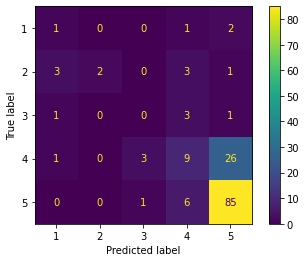

In [13]:
#Testing purposes of each class
plot_confusion_matrix(model, vect.transform(x_test), y_test)#.savefig('MulticlassConfusionMatrix.png') #labels=[1, 2, 3, 4 ,5]

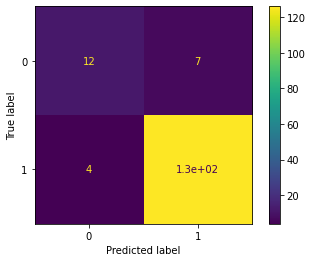

In [14]:
#plot_confusion_matrix(y_test_binary, model_binary.predict(vectBinary.transform(x_test_binary)), labels=[0,1])
plot_confusion_matrix(model_binary, vectBinary.transform(x_test_binary), y_test_binary)

In [24]:
tfvect = TfidfVectorizer(min_df = 3, ngram_range = (1,3)).fit(x_train)
tfvectBinary = TfidfVectorizer(min_df = 3, ngram_range = (1,2)).fit(x_train_binary)
#len(vect.get_feature_names())

x_train_vectorizedTF = tfvect.transform(x_train)
x_train_vectorized_binaryTF = tfvectBinary.transform(x_train_binary)

modelTF = LogisticRegression(multi_class = 'multinomial',max_iter=1000)
modelTF.fit(x_train_vectorizedTF, y_train)

model_binaryTF = LogisticRegression(max_iter=1000)
model_binaryTF.fit(x_train_vectorized_binaryTF, y_train_binary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(modelTF.score(tfvect.transform(five['reviews.text']),five_labels))
print(modelTF.score(tfvect.transform(four['reviews.text']),four_labels))
print(modelTF.score(tfvect.transform(three['reviews.text']),three_labels))
print(modelTF.score(tfvect.transform(two['reviews.text']),two_labels))
print(modelTF.score(tfvect.transform(one['reviews.text']),one_labels))
 
print(model_binaryTF.score(tfvectBinary.transform(pos['reviews.text']),pos_labels))
print(model_binaryTF.score(tfvectBinary.transform(neg['reviews.text']),neg_labels))

1.0
0.4738955823293173
0.0
0.12
0.17647058823529413
0.9988221436984688
0.13194444444444445


In [26]:
print(modelTF.score(tfvect.transform(x_test),y_test))
model_binaryTF.score(tfvectBinary.transform(x_test_binary),y_test_binary)

0.6510067114093959


0.8657718120805369

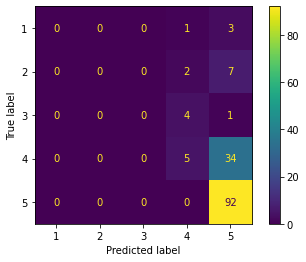

In [27]:
plot_confusion_matrix(modelTF, tfvect.transform(x_test), y_test)

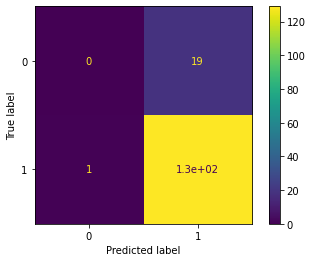

In [28]:
plot_confusion_matrix(model_binaryTF, tfvectBinary.transform(x_test_binary), y_test_binary)

In [29]:
mdPred = model.predict(vect.transform(x_test))
mdBinaryPred = model_binary.predict(vectBinary.transform(x_test_binary))

print(classification_report(y_test,mdPred))
print(classification_report(y_test_binary, mdBinaryPred))

predTF = modelTF.predict(tfvect.transform(x_test))
predTfBinary = model_binaryTF.predict(tfvectBinary.transform(x_test))

print(classification_report(y_test, predTF))
print(classification_report(y_test_binary, predTfBinary))

              precision    recall  f1-score   support

           1       0.17      0.25      0.20         4
           2       1.00      0.22      0.36         9
           3       0.00      0.00      0.00         5
           4       0.41      0.23      0.30        39
           5       0.74      0.92      0.82        92

    accuracy                           0.65       149
   macro avg       0.46      0.33      0.34       149
weighted avg       0.63      0.65      0.61       149

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.95      0.97      0.96       130

    accuracy                           0.93       149
   macro avg       0.85      0.80      0.82       149
weighted avg       0.92      0.93      0.92       149

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         9
           3       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


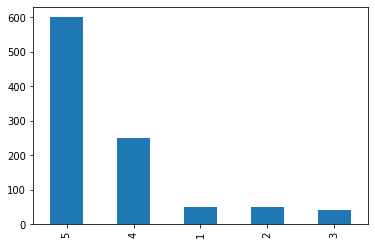

In [ ]:
y = rawData['reviews.rating']
y.value_counts().plot.bar(x='Number of Stars', y='Count')

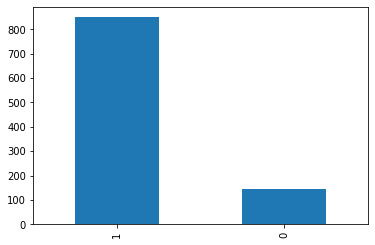

In [ ]:
y = binaryData['reviews.rating']
y.value_counts().plot.bar(x='Number of Stars', y='Count')

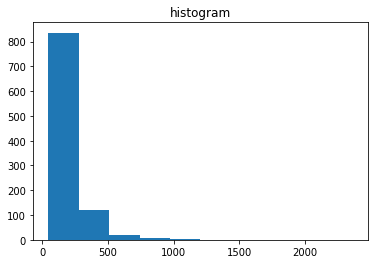

In [ ]:
dataNumpy = data.to_numpy()

lengths = np.zeros((len(dataNumpy),1))
for i in range(len(dataNumpy)):
    #print(len(dataNumpy[i, 0]))
    lengths[i,0] = len(dataNumpy[i, 0])
#print(lengths)
pylt.hist(lengths) 
pylt.title("histogram") 
pylt.show()